# Spiral testing
Code exploring the mechanics behind the generation of the pupils spiral pattern

In [13]:
import math
import numpy as np

def binarized_ringed_flipped(r, phi, phase, thresh=0., white=0, empty=0., r_max=15., r_min=2., r_split=5.):
    # Spiral parameters
    alpha1 = 20.186
    m1 = 5
    eta1 = -1.308
    m2 = -5
    alpha2 = 16.149
    eta2 = -0.733
    m3 = 10
    alpha3 = 4.0372
    eta3 = -0.575    

    s = 0.15/300. # m/internal sampling dist

    black = phase
    v = empty
    r = r/s
    if (r<=r_max and r>r_min):
        logr = log10(r)
        chi1 = alpha1*logr+m1*phi+eta1
        c1 = cos(chi1)
        chi2 = alpha2*logr+m2*phi+eta2
        c2 = cos(chi2)
        chi3 = alpha3*logr+m3*phi+eta3
        c3 = sin(chi3)
        if (r>r_split): # Outer rim
            if (c3<thresh):
                if (sin(chi3/2.)<thresh):
                    v=black if (c1*c2*c3>thresh) else white
                else:
                    v=black                
            else:                
                v=black if (c1*c2*c3>thresh) else white
        else: # Main spiral
            v=black if (c1*c2*c3>thresh) else white
    return v

def gen_opdmap(opd_func, ngrid, sampling):    
    opd_map = np.zeros([ngrid, ngrid], dtype = np.float64)
    c = ngrid/2.
    for i in range(ngrid):
        for j in range(ngrid):
            x = i - c
            y = j - c
            phi = math.atan2(y, x)
            r = sampling*math.hypot(x,y)
            opd_map[i][j] = opd_func(r, phi)
        
    return opd_map

def binarized_ringed_525_scaled(r, phi, r_max=15., r_min=2., r_split=5):
    phase = 525.*1e-9*0.5 # Has units of nm
    return binarized_ringed_flipped(r, phi, phase, r_max=r_max, r_min=r_min, r_split=r_split)

In [14]:
spiral = gen_opdmap(binarized_ringed_525_scaled, 2048, 5)

In [15]:
print(type(spiral[0][0]))

<class 'numpy.float64'>


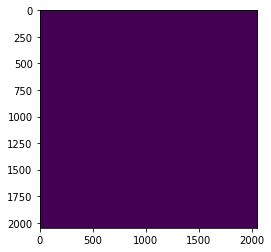

In [17]:
import matplotlib.pyplot as plt
plt.imshow(np.angle(spiral))
# plt.colorbar()
plt.show()